In [1]:
### Week 9-2: Clustering Lab

## Data source: https://data.fivethirtyeight.com/
## Import data
import pandas as pd

df = pd.read_csv('uber.csv')
df.head()

X = df[['Lat','Lon']]

/Users/chpyo/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


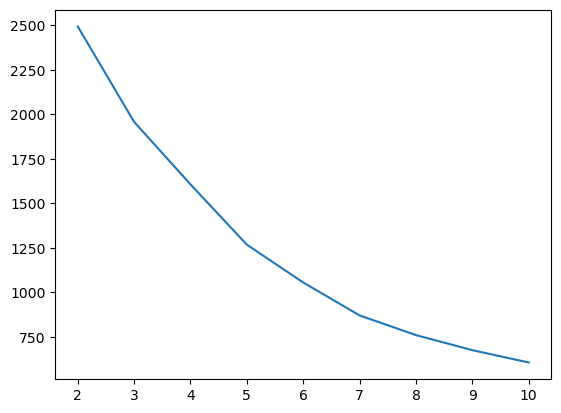

In [2]:
## Finding optimal K using elbow method
from sklearn.cluster import KMeans
withinss = []
for i in range (2,11):    
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X)
    withinss.append(model.inertia_)

from matplotlib import pyplot
pyplot.plot([2,3,4,5,6,7,8,9,10],withinss)

In [ ]:
## Finding optimal K using silhouette score
# But is this going to be computationally efficient?
from sklearn.metrics import silhouette_score
for i in range (2,11):    
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X)
    labels = model.labels_
    print(i,':',silhouette_score(X,labels))

In [ ]:
## Finding optimal K using pseudo F-statistics
from sklearn.metrics import calinski_harabasz_score
from scipy.stats import f
for i in range (2,11):    
    df1=i-1
    df2=df.shape[0]-i
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X)
    labels = model.labels_
    score = calinski_harabasz_score(X, labels)
    print(i,':',1-f.cdf(score, df1, df2))

In [ ]:
## Run K-Means with k=6
kmeans = KMeans(n_clusters=6)
model = kmeans.fit(X)
model.cluster_centers_

clusters = pd.DataFrame(model.cluster_centers_, columns=['Latitude', 'Longitude'])

In [ ]:
## Plot the cluster centers on the map using Folium library
# pip install folium 
centroid = clusters.values.tolist()

import folium
import webbrowser
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 25)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = point).add_to(map)
map.save("map.html")
webbrowser.open("map.html")

In [ ]:
## Some additional follow-ups
# Check the demand for each cluster
labels = model.labels_
df['Cluster']=labels
df['Cluster'].value_counts()

# New location
new=[(40.7291,73.9963)] # address of NYU Stern
model.predict(new)